<a href="https://colab.research.google.com/github/MariPinas/data_science_2025/blob/main/notebooks/Lab04_TCL_Plots/Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Estatística com Boxplots, Histogramas e Z-scores

Neste notebook, vamos explorar conceitos importantes de estatística descritiva através de exercícios práticos. Você trabalhará com:
- Análise de tendência central e dispersão usando boxplots
- Interpretação de histogramas e cálculo de z-scores
- Uso de tabelas de distribuição normal para cálculo de probabilidades
- Comparação entre conjuntos de dados

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuração inicial

sns.set_style("whitegrid")
plt.style.use('ggplot')
%matplotlib inline

## Exercício 1: Análise de Boxplots - Tendência Central e Dispersão


Considere os seguintes conjuntos de dados que representam notas de alunos em três turmas diferentes:

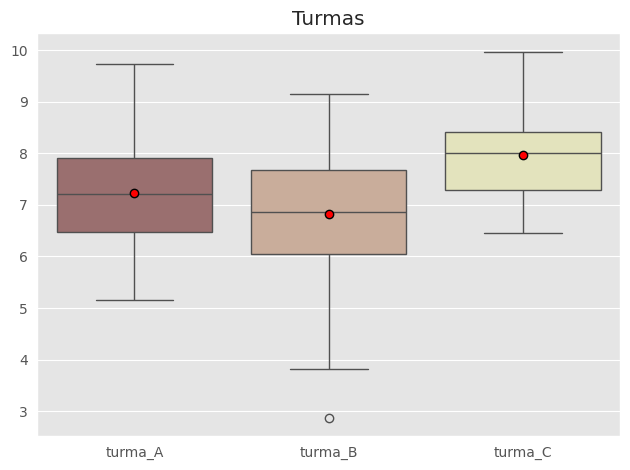

In [17]:
# Dados das turmas
np.random.seed(42)
turma_A = np.random.normal(7.5, 1.2, 50)
turma_B = np.random.normal(6.8, 1.5, 50)
turma_C = np.random.normal(8.0, 0.8, 50)

# Crie um dataframe com as turmas
dados = pd.DataFrame({
    'turma_A': turma_A,
    'turma_B': turma_B,
    'turma_C': turma_C
})

# Plot um boxplot
sns.boxplot(data=dados, palette='pink', showmeans=True, meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black"})
plt.title('Turmas')

plt.tight_layout()
plt.show()


**Perguntas**:
1. Qual turma apresenta a maior mediana de notas? E a menor?
Resp: Maior mediana: Turma C, Menor mediana: Turma B
2. Qual turma tem a maior dispersão nas notas? Justifique observando o boxplot.
Resp: Turma B
3. Há presença de outliers em alguma turma? Se sim, em qual(is)?
Resp: Sim, na turma B.
4. Com base no boxplot, qual turma você diria que tem o desempenho mais homogêneo?
Resp: Turma C, pois há menos disperção

## Exercício 2: Análise de Histograma e Cálculo de Z-score


Considere a distribuição de alturas de uma população adulta (em cm):

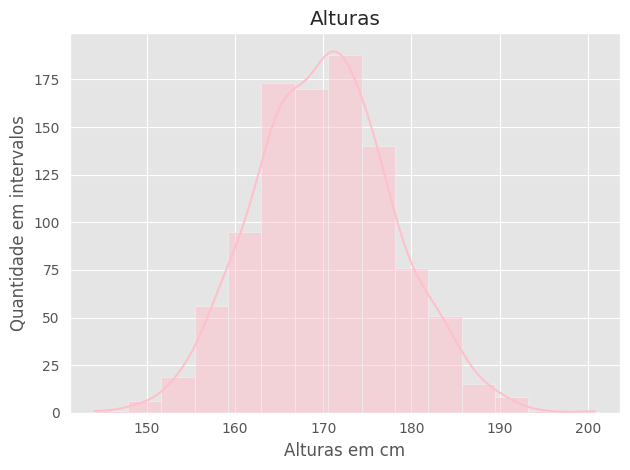


Média: 170.15 cm
Desvio padrão: 7.83 cm
Z-score 185 cm: 1.90
Z-score 160 cm: -1.30 Porcentagem: 9.73%
Z-score 165 cm: -0.66 Porcentagem: 25.52%
Z-score 175 cm: 0.62 Porcentagem: 73.20%
Probabilidade: 47.68%
Altura do Percentil 90: 180.19


In [ ]:
# Dados de altura
np.random.seed(42)
alturas = np.random.normal(170, 8, 1000)

# Plot o histograma
sns.histplot(data=alturas, bins=15, kde=True, color='pink')
plt.title('Alturas')
plt.xlabel('Alturas em cm')
plt.ylabel('Quantidade em intervalos')
plt.tight_layout()
plt.show()

# Complete o código para mostrar as Estatísticas descritivas

media = alturas.mean()
desvio_padrao = alturas.std()
zscore1 = (185 - media) / desvio_padrao
zscore2 = (160 - media) / desvio_padrao
zscore3 = (165 - media) / desvio_padrao
zscore4 = (175 - media) / desvio_padrao

p1 = stats.norm.cdf(zscore2) * 100
p2 = stats.norm.cdf(zscore3) * 100
p3 = stats.norm.cdf(zscore4) * 100

probabilidade = p3 - p2

print(f"\nMédia: {media:.2f} cm")
print(f"Desvio padrão: {desvio_padrao:.2f} cm")
print(f"Z-score 185 cm: {zscore1:.2f}")
print(f"Z-score 160 cm: {zscore2:.2f} Porcentagem: {p1:.2f}%")
print(f"Z-score 165 cm: {zscore3:.2f} Porcentagem: {p2:.2f}%")
print(f"Z-score 175 cm: {zscore4:.2f} Porcentagem: {p3:.2f}%")
print(f"Probabilidade: {probabilidade:.2f}%")
print(f"Altura do Percentil 90: {stats.norm.ppf(0.9, media, desvio_padrao):.2f}")





**Perguntas**:
1. Qual é o z-score para uma altura de 185 cm?
Resp: 1.90
2. Qual a probabilidade de uma pessoa ter altura menor que 160 cm? (Use a tabela Z)
Resp: 9.73%
3. Qual a probabilidade de uma pessoa ter altura entre 165 cm e 175 cm?
Resp: 47.68%
4. Que altura corresponde ao percentil 90? (Use a tabela Z inversa)
Resp: 180.19 cm

## Exercício 3: Comparação entre Conjuntos de Dados usando Z-scores


Considere os seguintes dados de desempenho em duas disciplinas diferentes:

In [12]:
# Dados das disciplinas
matematica = np.random.normal(6.5, 1.8, 200)
portugues = np.random.normal(7.2, 1.2, 200)

# Crie um dataframe
np.random.seed(42)
materias = pd.DataFrame({
    'matematica': matematica,
    'portugues': portugues
})

# Mostre os valores de média e desvio padrão para as duas disciplinas
print("Matemática:")
mediaM = matematica.mean()
stdM= matematica.std()
print(f"Média: {mediaM:.2f}")
print(f"Desvio padrão: {stdM:.2f}\n")

mediaP = portugues.mean()
stdP = portugues.std()
print("Português:")
print(f"Média: {mediaP:.2f}")
print(f"Desvio padrão: {stdP:.2f}")

# z-score de 5.0
zscoreMAT = (5.0 - mediaM) / stdM
print(f"Z-score de 5.0 em Matematica: {zscoreMAT:.2f}")

# formula inversa do z-score para calcular a nota equivalente de mat para port
notaP = zscoreMAT * stdP + mediaP
print(f"Nota equivalente em Portugues: {notaP:.2f}")

# funcao ppf do scipy para calcular o valor da nota de matematica de acordo com percentil

notaPercM = stats.norm.ppf(0.75, loc=mediaM, scale=stdM)
zscorePercM = (notaPercM - mediaM) / stdM
notaPEquiv = zscorePercM * stdP + mediaP
print(f"Nota equivalente em Portugues: {notaPEquiv:.2f}")

# calculando o CV

CVM = (stdM / mediaM) * 100
CVP = (stdP / mediaP) * 100

if CVM > CVP:
    print("A disciplina de Matemática tem maior variabilidade relativa.")
else:
    print("A disciplina de Português tem maior variabilidade relativa.")


Matemática:
Média: 6.43
Desvio padrão: 1.67

Português:
Média: 7.30
Desvio padrão: 1.18
Z-score de 5.0 em Matematica: -0.85
Nota equivalente em Portugues: 6.29
Nota equivalente em Portugues: 8.10
A disciplina de Matemática tem maior variabilidade relativa.


**Perguntas**:
1. Um aluno tirou 8.5 em Matemática e 7.8 em Português. Em qual disciplina ele se saiu melhor em relação à turma?
RESP.: Em matemática, pois a media da turma eh 6.43 e ele tirou 8.5, ou seja, ele esta bem a frente da media da turma.
2. Qual nota em Português seria equivalente a uma nota de 5.0 em Matemática (em termos de posição relativa)? RESP.: 6.29
3. Se um aluno está no percentil 75 em Matemática, qual seria a nota equivalente em Português? Resp.: 8.10
4. Em qual disciplina há maior variabilidade relativa no desempenho dos alunos? Resp.: A disciplina de matematica tem maior variabilidade relativa no desempenho dos alunos. Isso pode ser notado pelo seu coeficiente de variacao que eh maior que o de portugues.

In [ ]:
# CDF calcula a probabilidade de uma variável aleatória ser menor ou igual
# a um determinado valor. Em outras palavras, ela responde à pergunta:
# "Qual a chance de a variável ser menor ou igual a X?".

#  A PPF é a inversa da CDF. Ela calcula o valor da variável aleatória
# correspondente a uma determinada probabilidade acumulada. Em outras palavras,
# ela responde à pergunta: "Qual o valor da variável para que a probabilidade acumulada seja Y?".

## Exercício 4: Integração de Conceitos - Boxplot, Histograma e Probabilidade


Considere os dados de tempo de entrega (em minutos) de dois restaurantes:

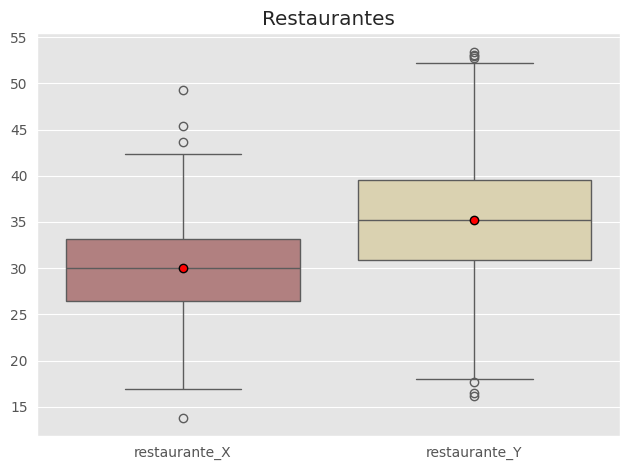

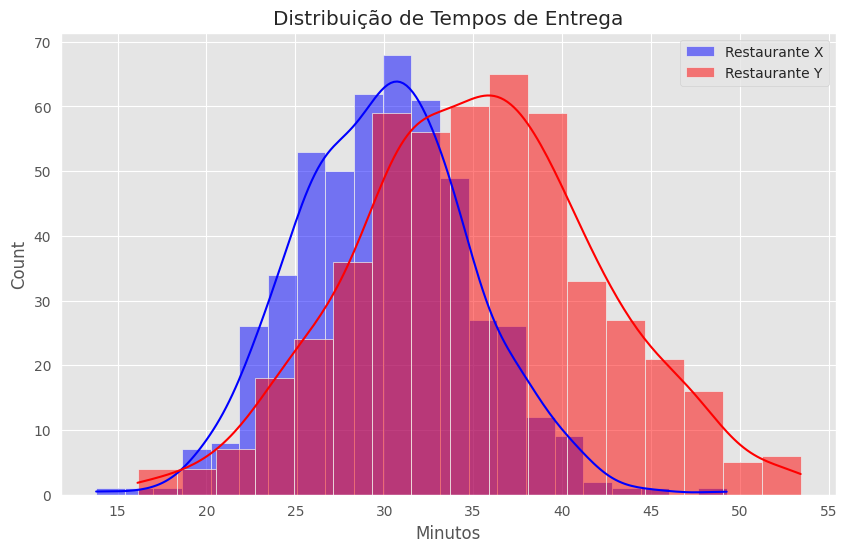

Media rest X: 30.03
Media rest Y: 35.22
STD rest X: 4.90
STD rest Y: 6.84
Prob do rest X entregar em menos de 25 minutos: 15.22%
Prob do rest Y entregar em menos de 25 minutos: 6.75%
95% de chance de receber o pedido do restaurante X em ate X minutos: 38.10 min
95% de chance de receber o pedido do restaurante Y em ate X minutos: 46.47 min
40 minutos NAO eh atípico para o restaurante X (Z-score = 2.03)
40 minutos NAO eh atípico para o restaurante Y (Z-score = 0.70)


In [36]:
# Dados dos restaurantes
restaurante_X = np.random.normal(30, 5, 500)
restaurante_Y = np.random.normal(35, 7, 500)

# Crie um Boxplot comparativo entre os restaurantes
np.random.seed(42)
restaurantes = pd.DataFrame({
    'restaurante_X': restaurante_X,
    'restaurante_Y': restaurante_Y
})

sns.boxplot(data=restaurantes, palette='pink', showmeans=True, meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black"})
plt.title('Restaurantes')

plt.tight_layout()
plt.show()

# Histograma superposto
plt.figure(figsize=(10, 6))
sns.histplot(restaurante_X, kde=True, color='blue', label='Restaurante X', alpha=0.5)
sns.histplot(restaurante_Y, kde=True, color='red', label='Restaurante Y', alpha=0.5)
plt.title('Distribuição de Tempos de Entrega')
plt.xlabel('Minutos')
plt.legend()
plt.show()

# media e std
mediaX = restaurante_X.mean()
mediaY = restaurante_Y.mean()
stdX = restaurante_X.std()
stdY = restaurante_Y.std()
print(f"Media rest X: {mediaX:.2f}")
print(f"Media rest Y: {mediaY:.2f}")
print(f"STD rest X: {stdX:.2f}")
print(f"STD rest Y: {stdY:.2f}")

# prob de entrega com cdf

tempo1 = 25

zscoreX = (tempo1 - mediaX) / stdX
probabilidadeX = stats.norm.cdf(zscoreX) * 100

zscoreY = (tempo1 - mediaY) / stdY
probabilidadeY = stats.norm.cdf(zscoreY) * 100

print(f"Prob do rest X entregar em menos de 25 minutos: {probabilidadeX:.2f}%")
print(f"Prob do rest Y entregar em menos de 25 minutos: {probabilidadeY:.2f}%")

# usando ppf para 95%
tempoX= stats.norm.ppf(0.95,loc=restaurante_X.mean(), scale=restaurante_X.std())
tempoY= stats.norm.ppf(0.95,loc=restaurante_Y.mean(), scale=restaurante_Y.std())

print(f"95% de chance de receber o pedido do restaurante X em ate X minutos: {tempoX:.2f} min")
print(f"95% de chance de receber o pedido do restaurante Y em ate X minutos: {tempoY:.2f} min")

# 40 min seria atipico para algum dos restaurantes? outlier 3
tempo2 = 40
outlier=3
zscoreX = (tempo2 - mediaX) / stdX
zscoreY = (tempo2 - mediaY) / stdY

# outlier restaurante X
if abs(zscoreX) > outlier:
    print(f"40 minutos eh atípico para o restaurante X (Z-score = {zscoreX:.2f})")
else:
    print(f"40 minutos NAO eh atípico para o restaurante X (Z-score = {zscoreX:.2f})")

# outlier restaurante Y
if abs(zscoreY) > outlier:
    print(f"40 minutos eh atípico para o restaurante Y (Z-score = {zscoreY:.2f})")
else:
    print(f"40 minutos NAO eh atípico para o restaurante Y (Z-score = {zscoreY:.2f})")


**Perguntas**:
1. Qual restaurante tem o tempo médio de entrega menor? E qual tem maior variabilidade?
RESP.: O restaurante X tem o tempo medio de entrega menor, ja o restaurante Y tem maior variabilidade.

2. Calcule a probabilidade de cada restaurante entregar em menos de 25 minutos.
RESP.: Rest x : 15.22% e Rest  Y: 6.75%

3. Se um cliente quer ter 95% de chance de receber seu pedido em até X minutos, qual seria X para cada restaurante?
Resp.: Rest X: 38.10 min e Rest Y: 46.47 min

4. Um tempo de 40 minutos seria considerado atípico para algum dos restaurantes? Justifique usando z-scores.
Resp.: Z-score do Rest X: 2.03 (nao eh considerado outlier) entao esta dentro do normal
Z-score do Rest Y: 0.70, proximo a media, entao eh ainda mais comum 40 min de entrega no Rest Y do que no Rest X